## FINDING THE Better Strategy

In [1]:
import pandas as pd
import configparser
import numpy as np
from datetime import datetime
import dateutil.relativedelta
from matplotlib import pyplot as plt
#%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import os
import pickle


from scipy import stats

# Regular expressions
import re

# seaborn : advanced visualization
import seaborn as sns
print('seaborn version\t:',sns.__version__)

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', None) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})


from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

seaborn version	: 0.9.0


In [6]:
Borrower_df=pd.read_csv('D:\Assignment\Borrower_table.csv')
Borrower_df.shape

Loan_df=pd.read_csv('D:\Assignment\loan_table.csv')
Loan_df.shape


(101100, 12)

(101100, 5)

In [11]:
Borrower_df.head()

loan_id  is_first_loan  fully_repaid_previous_loans  \
0   289774              1                          nan   
1   482590              0                       1.0000   
2   135565              1                          nan   
3   207797              0                       1.0000   
4   828078              0                       0.0000   

   currently_repaying_other_loans  total_credit_card_limit  \
0                             nan                     8000   
1                          0.0000                     4500   
2                             nan                     6900   
3                          0.0000                     1200   
4                          0.0000                     6900   

   avg_percentage_credit_card_limit_used_last_year  saving_amount  \
0                                           0.4900           3285   
1                                           1.0300            636   
2                                           0.8200           2085   
3                                           0.8200            358   
4                                           0.8000           2138   

   checking_amount  is_employed  yearly_salary  age  dependent_number  
0             1073            0              0   47                 3  
1             5299            1          13500   33                 1  
2             3422            1          24500   38                 8  
3             3388            0              0   24                 1  
4             4282            1          18100   36                 1

In [7]:
Loan_df.head()

loan_id loan_purpose        date  loan_granted  loan_repaid
0    19454   investment  2012-03-15             0          nan
1   496811   investment  2012-01-17             0          nan
2   929493        other  2012-02-09             0          nan
3   580653        other  2012-06-27             1       1.0000
4   172419     business  2012-05-21             1       0.0000

In [8]:
Borrower_df.describe(include='all')

loan_id  is_first_loan  fully_repaid_previous_loans  \
count 101100.0000    101100.0000                   46153.0000   
mean  499666.8267         0.5435                       0.8993   
std   288662.0069         0.4981                       0.3009   
min       30.0000         0.0000                       0.0000   
25%   250333.7500         0.0000                       1.0000   
50%   499885.0000         1.0000                       1.0000   
75%   749706.2500         1.0000                       1.0000   
max   999987.0000         1.0000                       1.0000   

       currently_repaying_other_loans  total_credit_card_limit  \
count                      46153.0000              101100.0000   
mean                           0.3643                4112.7438   
std                            0.4812                2129.1215   
min                            0.0000                   0.0000   
25%                            0.0000                2700.0000   
50%                            0.0000                4100.0000   
75%                            1.0000                5500.0000   
max                            1.0000               13500.0000   

       avg_percentage_credit_card_limit_used_last_year  saving_amount  \
count                                       94128.0000    101100.0000   
mean                                            0.7241      1799.6176   
std                                             0.1865      1400.5451   
min                                             0.0000         0.0000   
25%                                             0.6000       834.0000   
50%                                             0.7300      1339.0000   
75%                                             0.8600      2409.0000   
max                                             1.0900     10641.0000   

       checking_amount  is_employed  yearly_salary         age  \
count      101100.0000  101100.0000    101100.0000 101100.0000   
mean         3177.1508       0.6587     21020.7280     41.4916   
std          2044.4482       0.4742     18937.5814     12.8256   
min             0.0000       0.0000         0.0000     18.0000   
25%          1706.0000       0.0000         0.0000     32.0000   
50%          2673.0000       1.0000     21500.0000     41.0000   
75%          4241.0000       1.0000     35300.0000     50.0000   
max         13906.0000       1.0000     97200.0000     79.0000   

       dependent_number  
count       101100.0000  
mean             3.8647  
std              2.6355  
min              0.0000  
25%              2.0000  
50%              3.0000  
75%              6.0000  
max              8.0000

In [9]:
## Checking NULL values
Borrower_df.isnull().sum()
Loan_df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        54947
currently_repaying_other_loans                     54947
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year     6972
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
dtype: int64

loan_id             0
loan_purpose        0
date                0
loan_granted        0
loan_repaid     53446
dtype: int64

In [11]:
Loan_df.loan_repaid.value_counts(dropna=False)
Borrower_df.currently_repaying_other_loans.value_counts(dropna=False)

nan       53446
1.0000    30706
0.0000    16948
Name: loan_repaid, dtype: int64

nan       54947
0.0000    29338
1.0000    16815
Name: currently_repaying_other_loans, dtype: int64

In [20]:
## Merging both the Dataframe
Full_df=Borrower_df.merge(Loan_df,on='loan_id',how='inner')
Full_df.shape

#Removing the Rejected Applications as we don't know about their target value
Rjected_Appl_df= Full_df[Full_df.loan_repaid.isnull()]
Rjected_Appl_df.shape
Full_df= Full_df[~Full_df.loan_repaid.isnull()]
Full_df.shape

## Almost Half of the applicaion are rejected by the bank.

(101100, 16)

(53446, 16)

(47654, 16)

## EDA 

In [13]:
Full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47654 entries, 2 to 101099
Data columns (total 16 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   loan_id                                          47654 non-null  int64  
 1   is_first_loan                                    47654 non-null  int64  
 2   fully_repaid_previous_loans                      21865 non-null  float64
 3   currently_repaying_other_loans                   21865 non-null  float64
 4   total_credit_card_limit                          47654 non-null  int64  
 5   avg_percentage_credit_card_limit_used_last_year  46751 non-null  float64
 6   saving_amount                                    47654 non-null  int64  
 7   checking_amount                                  47654 non-null  int64  
 8   is_employed                                      47654 non-null  int64  
 9   yearly_salary              

In [21]:
Full_df.loan_granted.value_counts()
###  It has only one value so removing the column
Full_df.drop(columns='loan_granted',inplace=True)
Full_df.shape

1    47654
Name: loan_granted, dtype: int64

(47654, 15)

In [22]:
Full_df.isnull().sum()

loan_id                                                0
is_first_loan                                          0
fully_repaid_previous_loans                        25789
currently_repaying_other_loans                     25789
total_credit_card_limit                                0
avg_percentage_credit_card_limit_used_last_year      903
saving_amount                                          0
checking_amount                                        0
is_employed                                            0
yearly_salary                                          0
age                                                    0
dependent_number                                       0
loan_purpose                                           0
date                                                   0
loan_repaid                                            0
dtype: int64

In [23]:
Full_df.fully_repaid_previous_loans.value_counts(dropna=False)
Full_df.currently_repaying_other_loans.value_counts(dropna=False)


nan       25789
1.0000    19733
0.0000     2132
Name: fully_repaid_previous_loans, dtype: int64

nan       25789
0.0000    15355
1.0000     6510
Name: currently_repaying_other_loans, dtype: int64

In [24]:
# Creating a separate category for First loaners in 'fully_repaid_previous_loans' & 'currently_repaying_other_loans'- value = 2
Full_df.fully_repaid_previous_loans.fillna(2,inplace=True)
Full_df.currently_repaying_other_loans.fillna(2,inplace=True)
Full_df.isnull().sum()
Full_df.fully_repaid_previous_loans.value_counts(dropna=False)
Full_df.currently_repaying_other_loans.value_counts(dropna=False)

loan_id                                              0
is_first_loan                                        0
fully_repaid_previous_loans                          0
currently_repaying_other_loans                       0
total_credit_card_limit                              0
avg_percentage_credit_card_limit_used_last_year    903
saving_amount                                        0
checking_amount                                      0
is_employed                                          0
yearly_salary                                        0
age                                                  0
dependent_number                                     0
loan_purpose                                         0
date                                                 0
loan_repaid                                          0
dtype: int64

2.0000    25789
1.0000    19733
0.0000     2132
Name: fully_repaid_previous_loans, dtype: int64

2.0000    25789
0.0000    15355
1.0000     6510
Name: currently_repaying_other_loans, dtype: int64

In [18]:
## droping the column is_first_loan as it already accounted in other fields
Full_df.is_first_loan.sum()
Full_df.drop(columns='is_first_loan',inplace=True)
Full_df.shape

25313

(46751, 15)

In [25]:
# Only one column has missing value- avg_percentage_credit_card_limit_used_last_year 

Full_df[Full_df.avg_percentage_credit_card_limit_used_last_year.isnull()].total_credit_card_limit.sum()
## It looks like they don't have any credit limits so might be not useful and  its small fraction so dropping the rows
Full_df.dropna(axis=0,subset=['avg_percentage_credit_card_limit_used_last_year'],inplace=True)
Full_df.shape

Full_df.isna().values.sum()

### ALL miising values removed.

0

(46751, 15)

0

In [32]:
### Using Plotly to draw the graphs 

import plotly.io as pio
pio.renderers.default = "kaggle"
from plotly.subplots import make_subplots
import plotly.graph_objects as go 
from plotly.offline import init_notebook_mode, iplot
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## EDA oN NUMERICAL VARIABLES

(array([2207.000000, 2245.000000, 2572.000000, 3153.000000, 3573.000000,
        3868.000000, 4101.000000, 3822.000000, 3833.000000, 3720.000000,
        3174.000000, 2716.000000, 2182.000000, 1698.000000, 1323.000000,
        951.000000, 687.000000, 439.000000, 271.000000, 216.000000]),
 array([18.000000, 21.050000, 24.100000, 27.150000, 30.200000, 33.250000,
        36.300000, 39.350000, 42.400000, 45.450000, 48.500000, 51.550000,
        54.600000, 57.650000, 60.700000, 63.750000, 66.800000, 69.850000,
        72.900000, 75.950000, 79.000000]),
 <BarContainer object of 20 artists>)

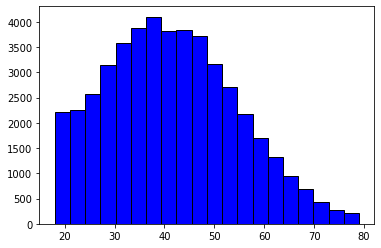

In [27]:
## Distribution of Age
plt.hist(Full_df['age'], color = 'blue', edgecolor = 'black',
         bins = 20)

In [33]:
Full_df.saving_amount.iplot(
    kind='hist',
    bins=50,
    xTitle='saving_account_money',
    linecolor='black',
    yTitle='count',
    title='Borrowers Saving account Distribution')

In [34]:
Full_df.checking_amount.iplot(
    kind='hist',
    bins=50,
    xTitle='checking_account_money',
    linecolor='black',
    yTitle='count',
    title='Borrowers Checking account Distribution')

In [35]:
Full_df['Tot_Acc_Money']=Full_df.saving_amount+Full_df.checking_amount

Full_df.Tot_Acc_Money.iplot(
    kind='hist',
    bins=50,
    xTitle='Total_account_money',
    linecolor='black',
    yTitle='count',
    title='Borrowers Tota account money Distribution')
##  Most of the population lies between 4-10k and the distribution is right skewed


<AxesSubplot:xlabel='loan_repaid', ylabel='age'>

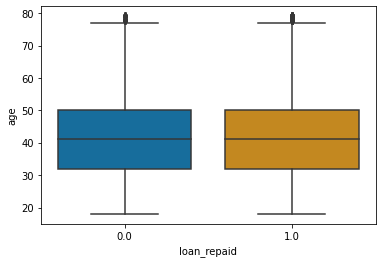

In [36]:
#plt.boxplot(br_df.BOUNCE_RATIO,col='FLOW_FLAG')

sns.boxplot(x='loan_repaid',y='age', 
                 data=Full_df, 
                 palette="colorblind"
                 )
## Both age groups are similar..

<AxesSubplot:xlabel='age'>

<AxesSubplot:xlabel='age'>

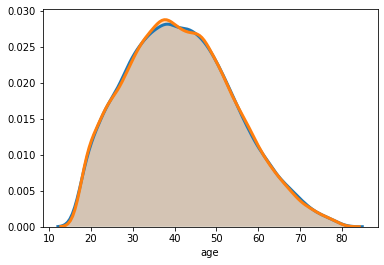

In [37]:
x1 = Full_df.loc[Full_df['loan_repaid'] == 1, 'age']
x0 = Full_df.loc[Full_df['loan_repaid'] == 0, 'age']


sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})

##  Looks similar for age so age is not a good discriminator 

<AxesSubplot:xlabel='loan_repaid', ylabel='Tot_Acc_Money'>

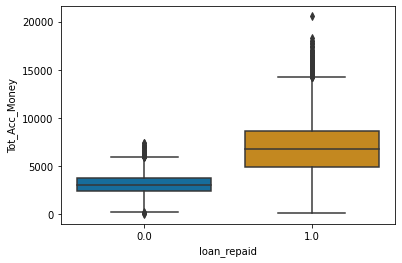

In [38]:
sns.boxplot(x='loan_repaid',y='Tot_Acc_Money', 
                 data=Full_df, 
                 palette="colorblind"
                 )
## It clearly shows that person having high Account balance are likely to pay. 
## There aee few outliers in both groups

<AxesSubplot:xlabel='Tot_Acc_Money'>

<AxesSubplot:xlabel='Tot_Acc_Money'>

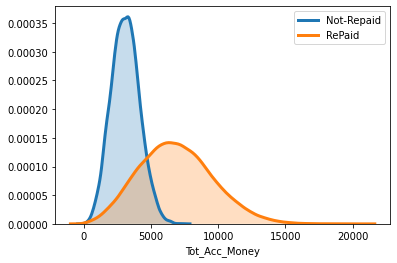

In [39]:
x1 = Full_df.loc[Full_df['loan_repaid'] == 1, 'Tot_Acc_Money']
x0 = Full_df.loc[Full_df['loan_repaid'] == 0, 'Tot_Acc_Money']

Repay = ['Not-paid','Re_Paid']
sns.distplot(x0, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='Not-Repaid')
sns.distplot(x1, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3},label='RePaid')

<AxesSubplot:xlabel='loan_repaid', ylabel='total_credit_card_limit'>

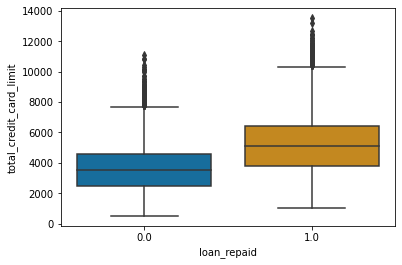

In [40]:
sns.boxplot(x='loan_repaid',y='total_credit_card_limit', 
                 data=Full_df, 
                 palette="colorblind"
                 )
## It clearly shows that person having high Credit Limit are likely to pay. 
## There are few outliers in both groups

In [ ]:
x1 = Full_df.loc[Full_df['loan_repaid'] == 1, 'total_credit_card_limit']
x0 = Full_df.loc[Full_df['loan_repaid'] == 0, 'total_credit_card_limit']

trace1 = go.Histogram(
    x=x0, name='Not RePaid',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'RePaid',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of total_credit_card_limit based on RePaid not Repaid')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

## It clearly shows that person having high Credit Limit are likely to pay. 

In [42]:
x1 = Full_df.loc[Full_df['loan_repaid'] == 1, 'avg_percentage_credit_card_limit_used_last_year']
x0 = Full_df.loc[Full_df['loan_repaid'] == 0, 'avg_percentage_credit_card_limit_used_last_year']

trace1 = go.Histogram(
    x=x0, name='Not RePaid',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'RePaid',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of avg_percentage_credit_card_limit_used_last_year based on RePaid not Repaid')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

# It shows people who are using less credit limit are  more likely to pay


In [43]:
x1 = Full_df.loc[Full_df['loan_repaid'] == 1, 'yearly_salary']
x0 = Full_df.loc[Full_df['loan_repaid'] == 0, 'yearly_salary']

trace1 = go.Histogram(
    x=x0, name='Not RePaid',
    opacity=0.75
)
trace2 = go.Histogram(
    x=x1, name = 'RePaid',
    opacity=0.75
)

data = [trace1, trace2]
layout = go.Layout(barmode='overlay', title='Distribution of yearly_salary based on RePaid not Repaid')
fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='overlaid histogram')

## People having high salary are paying high.
## There are few outliers though

## EDA ON DISCRETE OR CATAGORICAL VARIABLES

<AxesSubplot:label='b023d028-d1f0-4484-b4e6-52742fcb3a1a'>

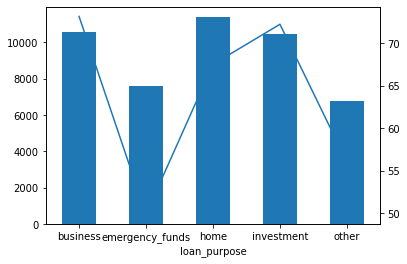

<AxesSubplot:label='d036a59f-26b4-4495-869f-22ee76adb71f'>

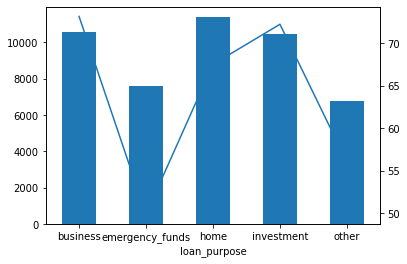

In [50]:
x=Full_df.copy()

ax = x.groupby(['loan_purpose']).loan_id.count().plot(kind='bar')
x.groupby(['loan_purpose']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## Emrgency Funds are the least likely to repay.
## Business, Inveestment and home are repaying loans

<AxesSubplot:label='4d2ddb89-efb6-409f-84fb-c6bac393c2a4'>

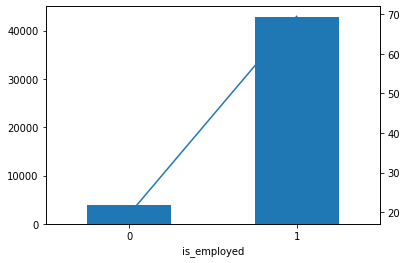

In [51]:
ax = x.groupby(['is_employed']).loan_id.count().plot(kind='bar')
x.groupby(['is_employed']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## Employed customers are likely to repay.


<AxesSubplot:label='b793483c-abbe-48c4-b90a-969b482dbf1e'>

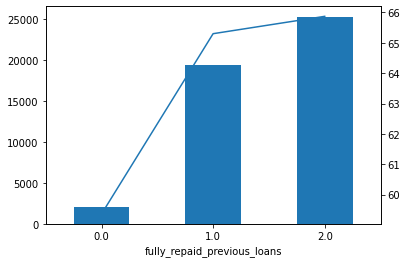

In [52]:
ax = x.groupby(['fully_repaid_previous_loans']).loan_id.count().plot(kind='bar')
x.groupby(['fully_repaid_previous_loans']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## Customers who had repaid prev loans and New loaners are repaying quite well

<AxesSubplot:label='cd43dbda-417e-44b0-bdc3-b9b9ab1783a2'>

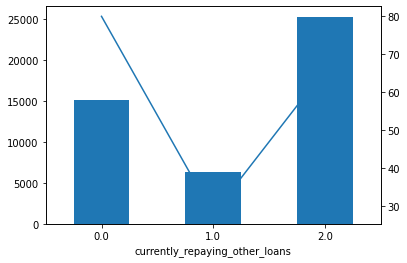

In [53]:
ax = x.groupby(['currently_repaying_other_loans']).loan_id.count().plot(kind='bar')
x.groupby(['currently_repaying_other_loans']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## Currently repaying  loaners are least likely to repay and customer who have no previous loans are most likely to repay

<AxesSubplot:label='c907eb1a-1102-4151-89b5-05737b81e97a'>

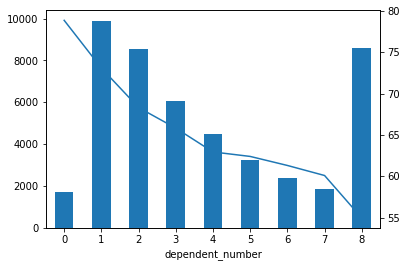

In [54]:
ax = x.groupby(['dependent_number']).loan_id.count().plot(kind='bar')
x.groupby(['dependent_number']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## As the number of dependents increases the chances of re-paying are getting lesser.
## 1,2 and 8 dependents are more in the data.

In [56]:
# Analsis of issue date
x['issue_d_date'] = pd.to_datetime(x.date, format = '%Y-%m-%d')
x['day_of_issue_d'] = x.issue_d_date.dt.day.tolist()
x['month_of_issue_d'] = x.issue_d_date.dt.month.tolist()

<AxesSubplot:label='144b6b52-c779-4da4-ab75-e8087ba8553b'>

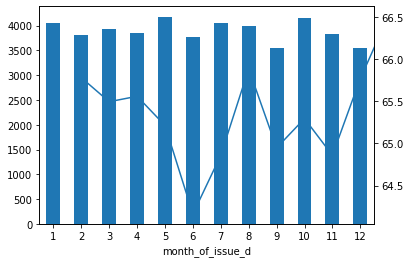

In [57]:
ax = x.groupby(['month_of_issue_d']).loan_id.count().plot(kind='bar')
x.groupby(['month_of_issue_d']).apply(lambda x: x.loan_repaid.mean()*100).plot(kind='line',secondary_y = True, ax = ax)

## Loan issued in the middle of the month are less likely to repay than issued towards the start/end of the month

In [59]:
# #del Customer_Receipt_details_df,Customer_Segments_details_df,Customer_Visit_details_df,Customer_details_df_Mortarium
# x.drop(x.columns[57],axis=1,inplace=True)
# x.shape


## BIVARIATE ANALYSIS

In [60]:
Full_df.columns

Index(['loan_id', 'is_first_loan', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_purpose', 'date', 'loan_repaid',
       'Tot_Acc_Money', 'issue_d_date', 'day_of_issue_d', 'month_of_issue_d'],
      dtype='object')

<AxesSubplot:xlabel='is_employed', ylabel='age'>

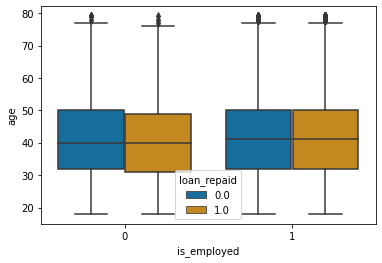

In [61]:
sns.boxplot(x=Full_df.is_employed.astype(str),y=Full_df.age,  
                 hue=Full_df.loan_repaid.astype(str),
                 palette="colorblind"
                 )
## There is no clear difference in Age for employed or not employed


<AxesSubplot:xlabel='is_employed', ylabel='total_credit_card_limit'>

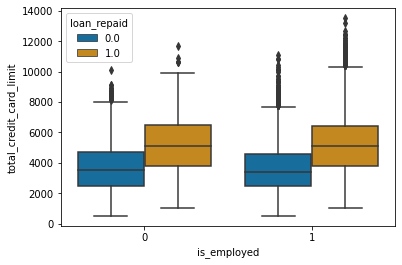

In [63]:
sns.boxplot(x=Full_df.is_employed.astype(str),y=Full_df.total_credit_card_limit,  
                 hue=Full_df.loan_repaid.astype(str),
                 palette="colorblind"
                 )
## There is no clear difference in tota_credit for employed or not employed

In [119]:
x.columns

Index(['loan_id', 'fully_repaid_previous_loans',
       'currently_repaying_other_loans', 'total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'saving_amount',
       'checking_amount', 'is_employed', 'yearly_salary', 'age',
       'dependent_number', 'loan_purpose', 'date', 'loan_repaid',
       'Tot_Acc_Money', 'issue_d_date', 'day_of_issue_d', 'month_of_issue_d'],
      dtype='object')

In [ ]:
fig = px.scatter(x, x="fully_repaid_previous_loans", y="yearly_salary", color="loan_repaid",
                 size='age', hover_data=['total_credit_card_limit'])
fig.update_yaxes(ticks="inside", title_text="<b>yearly_salary</b>")
fig.update_xaxes(ticks="inside",title_text="<b>fully_repaid_previous_loans </b>")
fig.update_layout(title='Multi variate Analysis ',title_x=0.5)

fig.show()

## Salary > 40 K are repaying and in not_paid prev loan, less age groups are more

In [ ]:
fig = px.scatter(x, x="month_of_issue_d", y="age", color="loan_repaid",
                 size='fully_repaid_previous_loans', hover_data=['total_credit_card_limit'])
fig.update_yaxes(ticks="inside", title_text="<b>age</b>")
fig.update_xaxes(ticks="inside",title_text="<b>month_of_issue_d</b>")
fig.update_layout(title='Multi variate Analysis ',title_x=0.5)

fig.show()

## Lona issues in Jan month is paying better than other months
## In oct and Nov , lesser age <30 are not repaying


In [ ]:
fig = px.scatter(x, x="loan_purpose", y="age", color="loan_repaid",
                 size='fully_repaid_previous_loans', hover_data=['total_credit_card_limit'])
fig.update_yaxes(ticks="inside", title_text="<b>age</b>")
fig.update_xaxes(ticks="inside",title_text="<b>loan purpose</b>")
fig.update_layout(title='Multi variate Analysis ',title_x=0.5)

fig.show()

## In Other and emrgency funds ,lesser age are NOT repaying
## In Inverstment , higher age are not repaying


## DATA PREPRATION for TRAIN and TEST

In [67]:
from sklearn.model_selection import train_test_split

In [70]:
## SPlitting the data in 80-20 ratio
loan_data_inputs_train, loan_data_inputs_test, loan_data_targets_train, loan_data_targets_test = train_test_split(\
            Full_df.drop('loan_repaid', axis = 1),Full_df['loan_repaid'], test_size = 0.2, random_state = 43)

In [71]:
loan_data_inputs_train.shape
loan_data_inputs_test.shape

(37400, 18)

(9351, 18)

## Checking Corelation between Numerical variables

<AxesSubplot:>

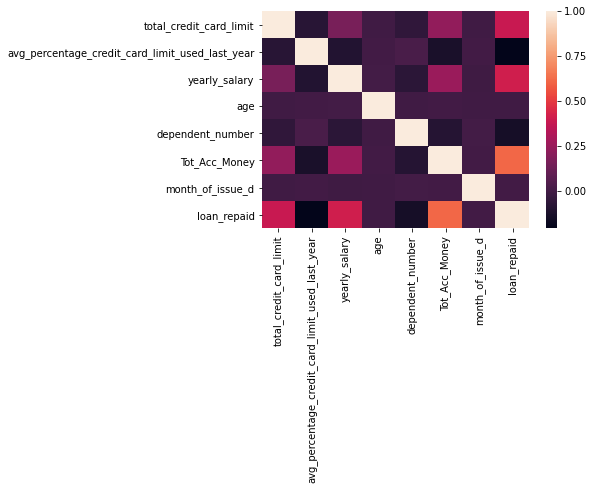

In [80]:
num_cols=['total_credit_card_limit','avg_percentage_credit_card_limit_used_last_year','yearly_salary', 'age',
'dependent_number', 'Tot_Acc_Money', 'month_of_issue_d']

cat_cols=['fully_repaid_previous_loans','currently_repaying_other_loans', 'is_employed','dependent_number', 'loan_purpose']

sns.heatmap(loan_data_inputs_train[num_cols].join(loan_data_targets_train).corr())

## Almost all independent numerical  variables are not correlated
## Tota_credit_limit, yearly_salary,TotA-cc_money are highly co-related to target

<AxesSubplot:>

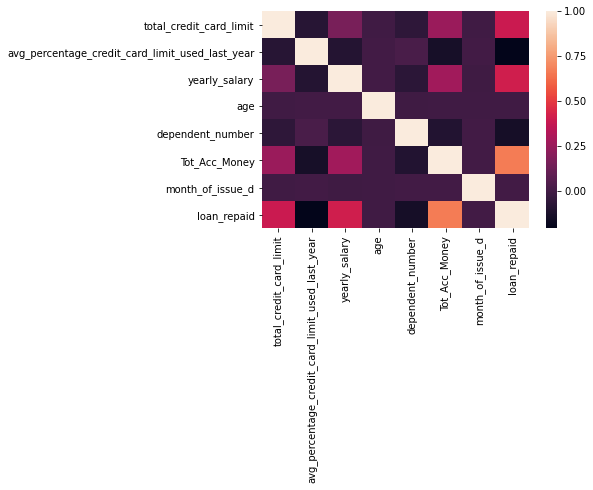

In [81]:
## Using SPEARMAN's method
sns.heatmap(loan_data_inputs_train[num_cols].join(loan_data_targets_train).corr(method="spearman"))

## Almost all independent numerical  variables are not correlated
## Tota_credit_limit, yearly_salary,TotA-cc_money are highly co-related to target

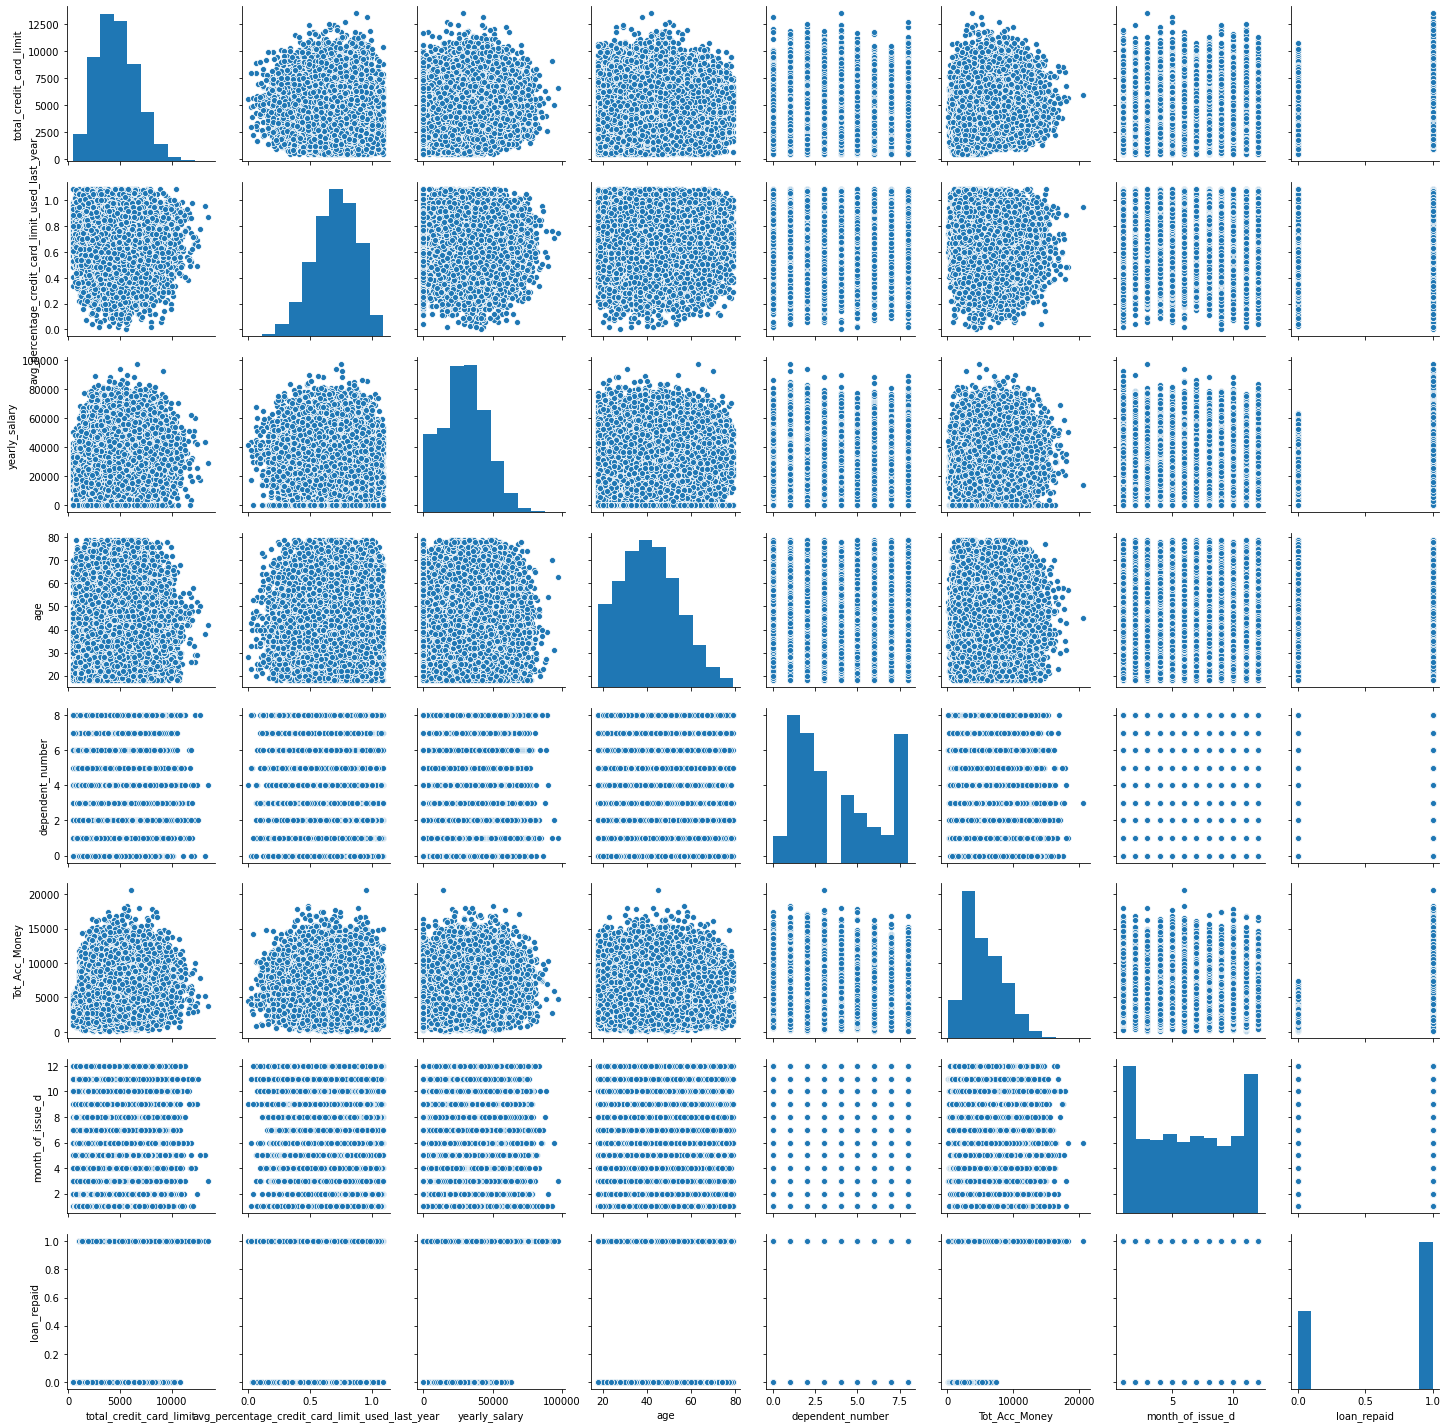

In [82]:
sns.pairplot(loan_data_inputs_train[num_cols].join(loan_data_targets_train))
## Numerical variables are not related so all can be taken for Modelling

In [83]:
##  Using Non Parametric Approach - Kendall to check correlation among Numerical values

from scipy.stats import kendalltau
# calculate kendall's correlation with independent variables
for col1 in num_cols:
    for col2 in num_cols:
        coef, p = kendalltau(x[col1], x[col2])
        print('Kenall coefficient between %s and %s: %.3f' %(col1,col2, coef))
# interpret the significance
#         alpha = 0.05
#         if p > alpha:
#             print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p,'\n')
#         else:
#             print('Samples are correlated (reject H0) p=%.3f' % p,'\n')


## From Kendall..No association among numerocal variables


Kenall coefficient between total_credit_card_limit and total_credit_card_limit: 1.000
Kenall coefficient between total_credit_card_limit and avg_percentage_credit_card_limit_used_last_year: -0.054
Kenall coefficient between total_credit_card_limit and yearly_salary: 0.110
Kenall coefficient between total_credit_card_limit and age: -0.002
Kenall coefficient between total_credit_card_limit and dependent_number: -0.041
Kenall coefficient between total_credit_card_limit and Tot_Acc_Money: 0.173
Kenall coefficient between total_credit_card_limit and month_of_issue_d: -0.002
Kenall coefficient between avg_percentage_credit_card_limit_used_last_year and total_credit_card_limit: -0.054
Kenall coefficient between avg_percentage_credit_card_limit_used_last_year and avg_percentage_credit_card_limit_used_last_year: 1.000
Kenall coefficient between avg_percentage_credit_card_limit_used_last_year and yearly_salary: -0.062
Kenall coefficient between avg_percentage_credit_card_limit_used_last_year and

In [84]:
from scipy.stats import kendalltau
# calculate kendall's correlation with TARGET
for col in num_cols:
    coef, p = kendalltau(loan_data_targets_train, x[col])
    print('Kenall coefficient for %s : %.3f' %(col, coef))
# interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p,'\n')
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p,'\n')


## From Kendall also, It can be seen that total_credit_card_limit, avg_percentage_credit_card_limit_used_last_year ,yearly_salary,
## and Tot_Acc_Money have statistically significant correlation with target(repaid)


Kenall coefficient for total_credit_card_limit : 0.323
Samples are correlated (reject H0) p=0.000 

Kenall coefficient for avg_percentage_credit_card_limit_used_last_year : -0.170
Samples are correlated (reject H0) p=0.000 

Kenall coefficient for yearly_salary : 0.339
Samples are correlated (reject H0) p=0.000 

Kenall coefficient for age : -0.001
Samples are uncorrelated (fail to reject H0) p=0.873 

Kenall coefficient for dependent_number : -0.122
Samples are correlated (reject H0) p=0.000 

Kenall coefficient for Tot_Acc_Money : 0.544
Samples are correlated (reject H0) p=0.000 

Kenall coefficient for month_of_issue_d : 0.002
Samples are uncorrelated (fail to reject H0) p=0.724 



## Checking Numerical with Categorical relation

In [85]:
import scipy.stats as stats

x=loan_data_inputs_train.copy()
#calculate point-biserial correlation
for col in num_cols:
    coef, p = stats.pointbiserialr(loan_data_targets_train, x[col])
    print('Biserialcorrelation coefficient for %s : %.3f' %(col, coef))
# interpret the significance
    alpha = 0.05
    if p > alpha:
        print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p,'\n')
    else:
        print('Samples are correlated (reject H0) p=%.3f' % p,'\n')
  #  print("Variable=",col,"and BiserialPoint stats=",stats.pointbiserialr(x.loan_repaid, x[col]),'\n')
    
## It can be seen that total_credit_card_limit, avg_percentage_credit_card_limit_used_last_year ,yearly_salary,
## and Tot_Acc_Money have statistically significant correlation with target(repaid)

Biserialcorrelation coefficient for total_credit_card_limit : 0.388
Samples are correlated (reject H0) p=0.000 

Biserialcorrelation coefficient for avg_percentage_credit_card_limit_used_last_year : -0.208
Samples are correlated (reject H0) p=0.000 

Biserialcorrelation coefficient for yearly_salary : 0.414
Samples are correlated (reject H0) p=0.000 

Biserialcorrelation coefficient for age : -0.001
Samples are uncorrelated (fail to reject H0) p=0.821 

Biserialcorrelation coefficient for dependent_number : -0.138
Samples are correlated (reject H0) p=0.000 

Biserialcorrelation coefficient for Tot_Acc_Money : 0.617
Samples are correlated (reject H0) p=0.000 

Biserialcorrelation coefficient for month_of_issue_d : 0.002
Samples are uncorrelated (fail to reject H0) p=0.720 



## Checking Ascoiation between Catagorical and Catagorical variables

In [86]:
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [87]:
## USING CRAMERS to check 
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [89]:
for col1 in cat_cols:
    for col2 in cat_cols:
        cr=cramers_v(x[col],x[col2])
        print('Cramers coefficient beween %s and %s: %.3f' %(col1,col2, cr))
        
 ## All catogorica independent variables are also not correlated       

Cramers coefficient beween fully_repaid_previous_loans and fully_repaid_previous_loans: 0.000
Cramers coefficient beween fully_repaid_previous_loans and currently_repaying_other_loans: 0.007
Cramers coefficient beween fully_repaid_previous_loans and is_employed: 0.000
Cramers coefficient beween fully_repaid_previous_loans and dependent_number: 0.004
Cramers coefficient beween fully_repaid_previous_loans and loan_purpose: 0.005
Cramers coefficient beween currently_repaying_other_loans and fully_repaid_previous_loans: 0.000
Cramers coefficient beween currently_repaying_other_loans and currently_repaying_other_loans: 0.007
Cramers coefficient beween currently_repaying_other_loans and is_employed: 0.000
Cramers coefficient beween currently_repaying_other_loans and dependent_number: 0.004
Cramers coefficient beween currently_repaying_other_loans and loan_purpose: 0.005
Cramers coefficient beween is_employed and fully_repaid_previous_loans: 0.000
Cramers coefficient beween is_employed and cu

## CHecking for CATOGRICAL and DISCRETE VARIABLES for Feature selection USING 
##  Weigh Of Evidence (WOE) method

In [90]:
# WoE function for discrete unordered variables
def woe_discrete(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [91]:
def plot_by_woe(df_WoE, rotation_of_x_axis_labels = 0):
    #x = df_WoE.iloc[:, 0]
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    y = df_WoE['WoE']
    plt.figure(figsize=(18, 6))
    plt.plot(x, y, marker = 'o', linestyle = '--', color = 'k')
    plt.xlabel(df_WoE.columns[0])
    plt.ylabel('Weight of Evidence')
    plt.title(str('Weight of Evidence by ' + df_WoE.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [92]:
# 'dependent'
df_temp = woe_discrete(loan_data_inputs_train, 'dependent_number', loan_data_targets_train)
df_temp

dependent_number  n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0                 8   6856     0.5465      0.1833 3747.0000 3109.0000   
1                 7   1461     0.6064      0.0391  886.0000  575.0000   
2                 6   1882     0.6073      0.0503 1143.0000  739.0000   
3                 5   2623     0.6214      0.0701 1630.0000  993.0000   
4                 4   3578     0.6314      0.0957 2259.0000 1319.0000   
5                 3   4853     0.6555      0.1298 3181.0000 1672.0000   
6                 2   6898     0.6845      0.1844 4722.0000 2176.0000   
7                 1   7832     0.7305      0.2094 5721.0000 2111.0000   
8                 0   1417     0.7897      0.0379 1119.0000  298.0000   

   prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0       0.1535      0.2393 -0.4439             nan       nan 0.0897  
1       0.0363      0.0443 -0.1982          0.0599    0.2457 0.0897  
2       0.0468      0.0569 -0.1945          0.0009    0.0038 0.0897  
3       0.0668      0.0764 -0.1350          0.0141    0.0595 0.0897  
4       0.0926      0.1015 -0.0925          0.0099    0.0424 0.0897  
5       0.1303      0.1287  0.0126          0.0241    0.1051 0.0897  
6       0.1935      0.1675  0.1442          0.0291    0.1316 0.0897  
7       0.2344      0.1625  0.3664          0.0459    0.2222 0.0897  
8       0.0458      0.0229  0.6925          0.0592    0.3261 0.0897

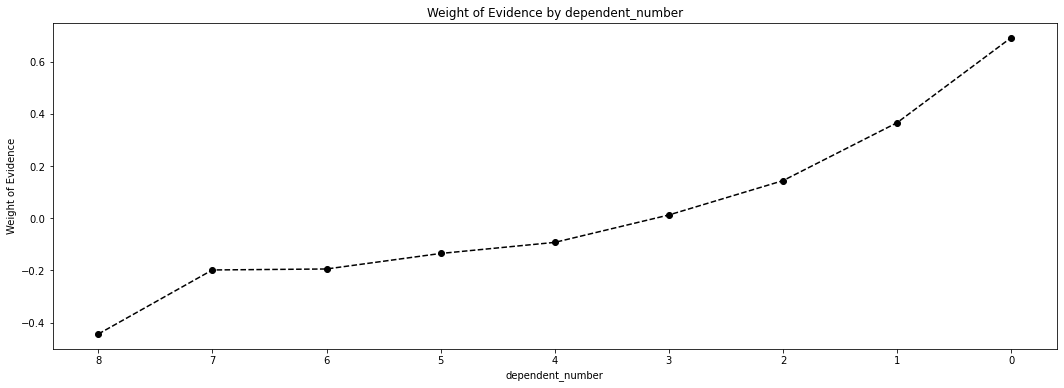

In [157]:
plot_by_woe(df_temp)

In [93]:
# 'loan_purpose'
df_temp = woe_discrete(loan_data_inputs_train, 'loan_purpose', loan_data_targets_train)
df_temp

loan_purpose  n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0  emergency_funds   6020     0.4942      0.1610 2975.0000 3045.0000   
1            other   5424     0.5577      0.1450 3025.0000 2399.0000   
2             home   9181     0.6801      0.2455 6244.0000 2937.0000   
3       investment   8296     0.7200      0.2218 5973.0000 2323.0000   
4         business   8479     0.7302      0.2267 6191.0000 2288.0000   

   prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0       0.1219      0.2344 -0.6538             nan       nan 0.1504  
1       0.1239      0.1847 -0.3987          0.0635    0.2551 0.1504  
2       0.2558      0.2261  0.1237          0.1224    0.5224 0.1504  
3       0.2447      0.1788  0.3138          0.0399    0.1902 0.1504  
4       0.2536      0.1761  0.3648          0.0102    0.0510 0.1504

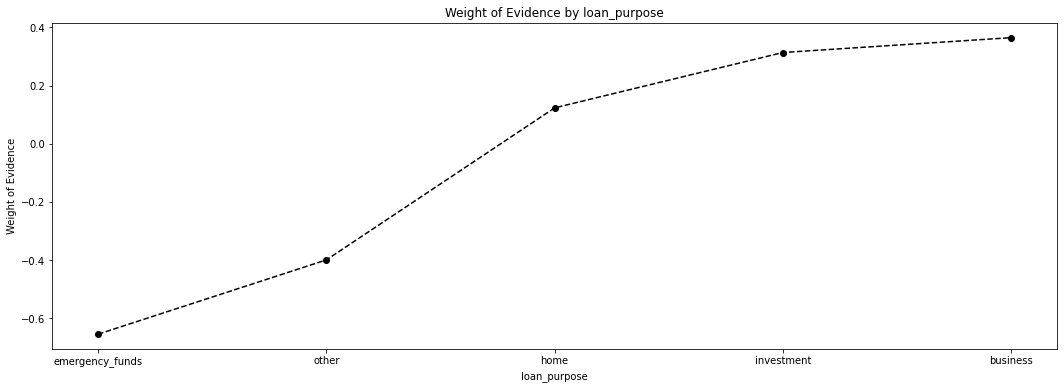

In [94]:
plot_by_woe(df_temp)

In [95]:
#fully_repaid_previous_loans
df_temp = woe_discrete(loan_data_inputs_train, 'fully_repaid_previous_loans', loan_data_targets_train)
df_temp

fully_repaid_previous_loans  n_obs  prop_good  prop_n_obs     n_good  \
0                       0.0000   1658     0.5850      0.0443   970.0000   
1                       1.0000  15467     0.6524      0.4136 10090.0000   
2                       2.0000  20275     0.6583      0.5421 13348.0000   

      n_bad  prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0  688.0000       0.0397      0.0530 -0.2871             nan       nan 0.0041  
1 5377.0000       0.4134      0.4139 -0.0012          0.0673    0.2859 0.0041  
2 6927.0000       0.5469      0.5332  0.0254          0.0060    0.0265 0.0041

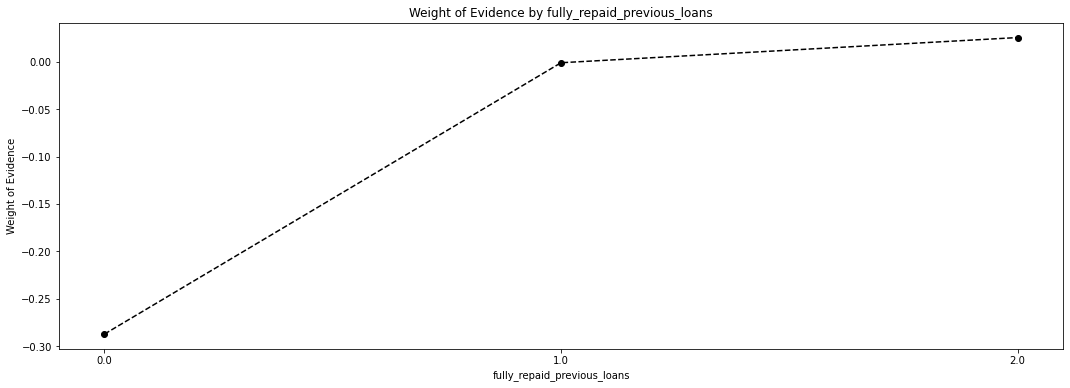

In [96]:
plot_by_woe(df_temp)

In [97]:
#currently_repaying_other_loans
df_temp = woe_discrete(loan_data_inputs_train, 'currently_repaying_other_loans', loan_data_targets_train)
df_temp



currently_repaying_other_loans  n_obs  prop_good  prop_n_obs     n_good  \
0                          1.0000   5064     0.2747      0.1354  1391.0000   
1                          2.0000  20275     0.6583      0.5421 13348.0000   
2                          0.0000  12061     0.8017      0.3225  9669.0000   

      n_bad  prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0 3673.0000       0.0570      0.2827 -1.6016             nan       nan 0.5243  
1 6927.0000       0.5469      0.5332  0.0254          0.3837    1.6269 0.5243  
2 2392.0000       0.3961      0.1841  0.7662          0.1433    0.7409 0.5243

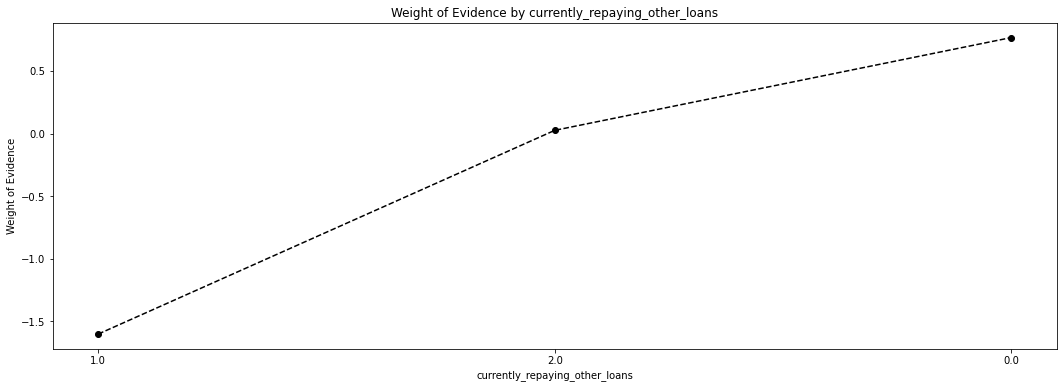

In [164]:
plot_by_woe(df_temp)

In [98]:
#is_employed
df_temp = woe_discrete(loan_data_inputs_train, 'is_employed', loan_data_targets_train)
df_temp


is_employed  n_obs  prop_good  prop_n_obs     n_good      n_bad  \
0            0   3105     0.1961      0.0830   609.0000  2496.0000   
1            1  34295     0.6939      0.9170 23799.0000 10496.0000   

   prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0       0.0250      0.1921 -2.0412             nan       nan 0.3727  
1       0.9750      0.8079  0.1881          0.4978    2.2293 0.3727

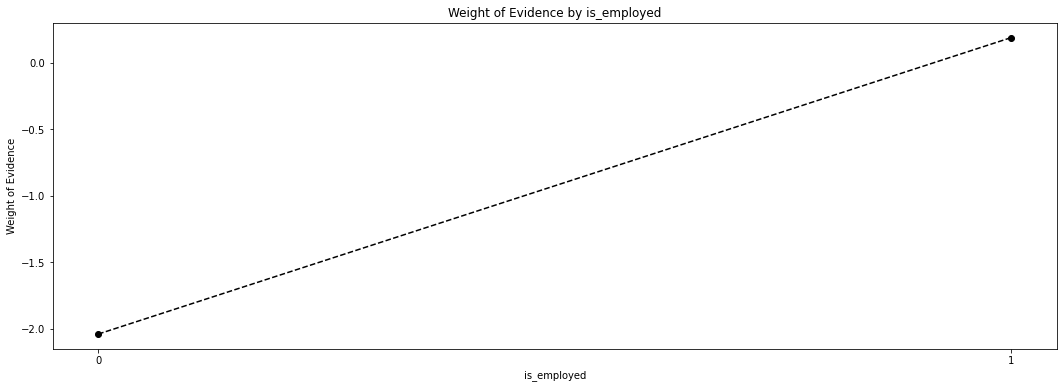

In [99]:
plot_by_woe(df_temp)

In [100]:
#month_of_issue_d
df_temp = woe_discrete(loan_data_inputs_train, 'month_of_issue_d', loan_data_targets_train)
df_temp


month_of_issue_d  n_obs  prop_good  prop_n_obs    n_good     n_bad  \
0                  6   3023     0.6437      0.0808 1946.0000 1077.0000   
1                 10   3278     0.6458      0.0876 2117.0000 1161.0000   
2                  5   3387     0.6469      0.0906 2191.0000 1196.0000   
3                  8   3190     0.6502      0.0853 2074.0000 1116.0000   
4                  4   3094     0.6506      0.0827 2013.0000 1081.0000   
5                  3   3158     0.6517      0.0844 2058.0000 1100.0000   
6                  9   2851     0.6531      0.0762 1862.0000  989.0000   
7                  1   3211     0.6559      0.0859 2106.0000 1105.0000   
8                  2   3025     0.6565      0.0809 1986.0000 1039.0000   
9                  7   3267     0.6575      0.0874 2148.0000 1119.0000   
10                11   3051     0.6591      0.0816 2011.0000 1040.0000   
11                12   2865     0.6618      0.0766 1896.0000  969.0000   

    prop_n_good  prop_n_bad     WoE  diff_prop_good  diff_WoE     IV  
0        0.0797      0.0829 -0.0390             nan       nan 0.0006  
1        0.0867      0.0894 -0.0299          0.0021    0.0091 0.0006  
2        0.0898      0.0921 -0.0252          0.0011    0.0047 0.0006  
3        0.0850      0.0859 -0.0108          0.0033    0.0144 0.0006  
4        0.0825      0.0832 -0.0088          0.0005    0.0020 0.0006  
5        0.0843      0.0847 -0.0042          0.0011    0.0047 0.0006  
6        0.0763      0.0761  0.0021          0.0014    0.0063 0.0006  
7        0.0863      0.0851  0.0144          0.0028    0.0122 0.0006  
8        0.0814      0.0800  0.0173          0.0007    0.0029 0.0006  
9        0.0880      0.0861  0.0215          0.0010    0.0042 0.0006  
10       0.0824      0.0800  0.0288          0.0016    0.0073 0.0006  
11       0.0777      0.0746  0.0407          0.0027    0.0118 0.0006

##  All catagorical and Discrete variable except "month_of_issue_d" looks good to be included. Age is also not very important, but including it

In [101]:
cat_cols=['fully_repaid_previous_loans','currently_repaying_other_loans', 'is_employed','dependent_number', 'loan_purpose']
num_cols=['total_credit_card_limit', 'avg_percentage_credit_card_limit_used_last_year','yearly_salary','age','dependent_number',
 'Tot_Acc_Money','month_of_issue_d']


In [102]:
loan_data_train_dummies = [pd.get_dummies(loan_data_inputs_train['fully_repaid_previous_loans'], prefix = 'fully_repaid_previous_loans', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_train['currently_repaying_other_loans'], prefix = 'currently_repaying_other_loans', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_train['is_employed'], prefix = 'is_employed', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_train['dependent_number'], prefix = 'dependent_number', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_train['loan_purpose'], prefix = 'loan_purpose', prefix_sep = ':')]
# We create dummy variables from all 5 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [103]:
loan_data_train_dummies = pd.concat(loan_data_train_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe

In [104]:
loan_data_train_dummies

fully_repaid_previous_loans:0.0  fully_repaid_previous_loans:1.0  \
18703                                 0                                1   
100204                                0                                0   
21591                                 0                                0   
22750                                 0                                1   
44849                                 0                                1   
...                                 ...                              ...   
54546                                 0                                0   
39807                                 0                                0   
88030                                 0                                0   
42669                                 0                                0   
30471                                 0                                0   

        fully_repaid_previous_loans:2.0  currently_repaying_other_loans:0.0  \
18703                                 0                                   1   
100204                                1                                   0   
21591                                 1                                   0   
22750                                 0                                   1   
44849                                 0                                   1   
...                                 ...                                 ...   
54546                                 1                                   0   
39807                                 1                                   0   
88030                                 1                                   0   
42669                                 1                                   0   
30471                                 1                                   0   

        currently_repaying_other_loans:1.0  \
18703                                    0   
100204                                   0   
21591                                    0   
22750                                    0   
44849                                    0   
...                                    ...   
54546                                    0   
39807                                    0   
88030                                    0   
42669                                    0   
30471                                    0   

        currently_repaying_other_loans:2.0  is_employed:0  is_employed:1  \
18703                                    0              0              1   
100204                                   1              0              1   
21591                                    1              0              1   
22750                                    0              0              1   
44849                                    0              0              1   
...                                    ...            ...            ...   
54546                                    1              1              0   
39807                                    1              0              1   
88030                                    1              0              1   
42669                                    1              0              1   
30471                                    1              0              1   

        dependent_number:0  dependent_number:1  dependent_number:2  \
18703                    0                   0                   0   
100204                   0                   0                   0   
21591                    0                   0                   1   
22750                    0                   0                   0   
44849                    0                   1                   0   
...                    ...                 ...                 ...   
54546                    0                   0                   0   
39807                    0                   0                   0   
88030                    0                   0    

In [105]:
loan_data_inputs_train.shape
loan_data_inputs_train = pd.concat([loan_data_inputs_train, loan_data_train_dummies], axis = 1)
loan_data_inputs_train.shape
loan_data_inputs_train_copy=loan_data_inputs_train.copy()
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

(37400, 18)

(37400, 40)

In [106]:
independent_cols=['total_credit_card_limit',
 'avg_percentage_credit_card_limit_used_last_year',
 'yearly_salary',
 'age',
 'Tot_Acc_Money',
 'fully_repaid_previous_loans:0.0',
 'fully_repaid_previous_loans:1.0',
 'fully_repaid_previous_loans:2.0',
 'currently_repaying_other_loans:0.0',
 'currently_repaying_other_loans:1.0',
 'currently_repaying_other_loans:2.0',
 'is_employed:0',
 'is_employed:1',
 'dependent_number:0',
 'dependent_number:1',
 'dependent_number:2',
 'dependent_number:3',
 'dependent_number:4',
 'dependent_number:5',
 'dependent_number:6',
 'dependent_number:7',
 'dependent_number:8',
 'loan_purpose:business',
 'loan_purpose:emergency_funds',
 'loan_purpose:home',
 'loan_purpose:investment',
 'loan_purpose:other']

In [108]:
# t=Full_df.Tot_Acc_Money.tolist()
# t_conv=StandardScaler().fit_transform(Full_df[['Tot_Acc_Money']])
# tm=pd.DataFrame()
# tm['t']=t
# tm['t_conv']=t_conv
# tm.head()
# # tm.t.mean(),tm.t_conv.mean(),tm.t.std()
# # 5558+2903
# # (8462-tm.t.mean())/tm.t.std()

In [109]:
from sklearn.preprocessing import StandardScaler

In [110]:
## Normalizing numerical variables
loan_data_inputs_train[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']]=StandardScaler().fit_transform(loan_data_inputs_train[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']])

In [111]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: , independent_cols]

In [112]:
inputs_train_with_ref_cat.columns

Index(['total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'yearly_salary',
       'age', 'Tot_Acc_Money', 'fully_repaid_previous_loans:0.0',
       'fully_repaid_previous_loans:1.0', 'fully_repaid_previous_loans:2.0',
       'currently_repaying_other_loans:0.0',
       'currently_repaying_other_loans:1.0',
       'currently_repaying_other_loans:2.0', 'is_employed:0', 'is_employed:1',
       'dependent_number:0', 'dependent_number:1', 'dependent_number:2',
       'dependent_number:3', 'dependent_number:4', 'dependent_number:5',
       'dependent_number:6', 'dependent_number:7', 'dependent_number:8',
       'loan_purpose:business', 'loan_purpose:emergency_funds',
       'loan_purpose:home', 'loan_purpose:investment', 'loan_purpose:other'],
      dtype='object')

In [113]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['fully_repaid_previous_loans:0.0',
'currently_repaying_other_loans:1.0',
'is_employed:0',
'dependent_number:8',
'loan_purpose:emergency_funds']

In [114]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

total_credit_card_limit  \
18703                    0.2032   
100204                  -1.1181   
21591                   -0.7481   
22750                   -0.8010   
44849                    0.1503   

        avg_percentage_credit_card_limit_used_last_year  yearly_salary  \
18703                                            0.5100         0.1356   
100204                                           0.9600        -0.2796   
21591                                            0.9500        -0.6638   
22750                                            0.6400         0.8358   
44849                                            0.9500         0.4516   

           age  Tot_Acc_Money  fully_repaid_previous_loans:1.0  \
18703  -1.2115        -0.9517                                1   
100204  0.5833        -0.4646                                0   
21591   1.1296        -0.1085                                0   
22750   0.9735        -1.0291                                1   
44849  -1.7577        -0.1553                                1   

        fully_repaid_previous_loans:2.0  currently_repaying_other_loans:0.0  \
18703                                 0                                   1   
100204                                1                                   0   
21591                                 1                                   0   
22750                                 0                                   1   
44849                                 0                                   1   

        currently_repaying_other_loans:2.0  is_employed:1  dependent_number:0  \
18703                                    0              1                   0   
100204                                   1              1                   0   
21591                                    1              1                   0   
22750                                    0              1                   0   
44849                                    0              1                   0   

        dependent_number:1  dependent_number:2  dependent_number:3  \
18703                    0                   0                   0   
100204                   0                   0                   0   
21591                    0                   1                   0   
22750                    0                   0                   1   
44849                    1                   0                   0   

        dependent_number:4  dependent_number:5  dependent_number:6  \
18703                    1                   0                   0   
100204                   0                   1                   0   
21591                    0                   0                   0   
22750                    0                   0                   0   
44849                    0                   0                   0   

        dependent_number:7  loan_purpose:business  loan_purpose:home  \
18703                    0                      0                  1   
100204                   0                      0                  0   
21591                    0                      0                  0   
22750                    0                      0                  0   
44849                    0                      0                  0   

        loan_purpose:investment  loan_purpose:other  
18703                         0                   0  
100204                        1                   0  
21591                         0                   0  
22750                         0                   1  
44849                         0                   0

## TRAINING THE MODEL-LOGISTICS REGRESSION

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [121]:
reg = LogisticRegression()
# We create an instance of an object from the 'LogisticRegression' class.
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
# with inputs (independent variables) contained in the first dataframe
# and targets (dependent variables) contained in the second dataframe.

LogisticRegression()

In [122]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object from the 'LogisticRegression' class.
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object from the 'LogisticRegression' class.

array([0.901596])

array([[1.026618, -2.495411, 1.085500, -0.009098, 3.017512, 0.291249,
        0.901546, 2.285992, 0.901546, 0.174930, 1.049265, 0.709035,
        0.563213, 0.339576, 0.231207, 0.284517, 0.170232, 0.090866,
        1.015630, 0.775162, 0.937385, 0.278075]])

In [123]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [124]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_values(by='Coefficients',ascending=False)
# Sorts the dataframe by index.
summary_table

Feature name  Coefficients
5                                     Tot_Acc_Money        3.0175
8                currently_repaying_other_loans:0.0        2.2860
3                                     yearly_salary        1.0855
11                               dependent_number:0        1.0493
1                           total_credit_card_limit        1.0266
19                            loan_purpose:business        1.0156
21                          loan_purpose:investment        0.9374
0                                         Intercept        0.9016
9                currently_repaying_other_loans:2.0        0.9015
7                   fully_repaid_previous_loans:2.0        0.9015
20                                loan_purpose:home        0.7752
12                               dependent_number:1        0.7090
13                               dependent_number:2        0.5632
14                               dependent_number:3        0.3396
6                   fully_repaid_previous_loans:1.0        0.2912
16                               dependent_number:5        0.2845
22                               loan_purpose:other        0.2781
15                               dependent_number:4        0.2312
10                                    is_employed:1        0.1749
17                               dependent_number:6        0.1702
18                               dependent_number:7        0.0909
4                                               age       -0.0091
2   avg_percentage_credit_card_limit_used_last_year       -2.4954

In [125]:
y_hat_train=reg.predict(inputs_train)

In [126]:
Train_Accuracy=100*(y_hat_train==loan_data_targets_train).sum()/len(loan_data_targets_train)
print(Train_Accuracy)
## Its 90%

89.80748663101605


## Predicting on Test data

In [127]:
loan_data_test_dummies = [pd.get_dummies(loan_data_inputs_test['fully_repaid_previous_loans'], prefix = 'fully_repaid_previous_loans', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_test['currently_repaying_other_loans'], prefix = 'currently_repaying_other_loans', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_test['is_employed'], prefix = 'is_employed', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_test['dependent_number'], prefix = 'dependent_number', prefix_sep = ':'),
                     pd.get_dummies(loan_data_inputs_test['loan_purpose'], prefix = 'loan_purpose', prefix_sep = ':')]
# We create dummy variables from all 5 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [128]:
loan_data_test_dummies = pd.concat(loan_data_test_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe

In [130]:
loan_data_inputs_test.shape
loan_data_inputs_test = pd.concat([loan_data_inputs_test, loan_data_test_dummies], axis = 1)
loan_data_inputs_test.shape
loan_data_inputs_test_copy=loan_data_inputs_test.copy()

# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

(9351, 18)

(9351, 40)

In [131]:
## Normalizing numerical variables
loan_data_inputs_test[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']]=StandardScaler().fit_transform(loan_data_inputs_test[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']])

In [132]:
# Here we select a limited set of input variables in a new dataframe.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[: , independent_cols]

In [133]:
inputs_test_with_ref_cat.columns

Index(['total_credit_card_limit',
       'avg_percentage_credit_card_limit_used_last_year', 'yearly_salary',
       'age', 'Tot_Acc_Money', 'fully_repaid_previous_loans:0.0',
       'fully_repaid_previous_loans:1.0', 'fully_repaid_previous_loans:2.0',
       'currently_repaying_other_loans:0.0',
       'currently_repaying_other_loans:1.0',
       'currently_repaying_other_loans:2.0', 'is_employed:0', 'is_employed:1',
       'dependent_number:0', 'dependent_number:1', 'dependent_number:2',
       'dependent_number:3', 'dependent_number:4', 'dependent_number:5',
       'dependent_number:6', 'dependent_number:7', 'dependent_number:8',
       'loan_purpose:business', 'loan_purpose:emergency_funds',
       'loan_purpose:home', 'loan_purpose:investment', 'loan_purpose:other'],
      dtype='object')

In [134]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['fully_repaid_previous_loans:0.0',
'currently_repaying_other_loans:1.0',
'is_employed:0',
'dependent_number:8',
'loan_purpose:emergency_funds']

In [135]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_test.head()

total_credit_card_limit  \
100861                  -0.6451   
19918                   -1.3358   
43416                   -1.4420   
92892                   -1.7608   
100709                  -0.6982   

        avg_percentage_credit_card_limit_used_last_year  yearly_salary  \
100861                                           0.6500        -0.4190   
19918                                            1.0100        -0.3882   
43416                                            0.8500        -1.0672   
92892                                            0.6500        -1.3449   
100709                                           0.7000         1.2908   

           age  Tot_Acc_Money  fully_repaid_previous_loans:1.0  \
100861 -0.5925        -0.9106                                0   
19918   0.4210        -0.2594                                0   
43416  -0.6704        -1.0866                                1   
92892   0.0312        -1.2147                                0   
100709  1.7462        -0.8618                                0   

        fully_repaid_previous_loans:2.0  currently_repaying_other_loans:0.0  \
100861                                1                                   0   
19918                                 1                                   0   
43416                                 0                                   1   
92892                                 1                                   0   
100709                                1                                   0   

        currently_repaying_other_loans:2.0  is_employed:1  dependent_number:0  \
100861                                   1              1                   0   
19918                                    1              1                   0   
43416                                    0              1                   0   
92892                                    1              1                   0   
100709                                   1              1                   0   

        dependent_number:1  dependent_number:2  dependent_number:3  \
100861                   0                   0                   1   
19918                    0                   1                   0   
43416                    0                   1                   0   
92892                    0                   1                   0   
100709                   1                   0                   0   

        dependent_number:4  dependent_number:5  dependent_number:6  \
100861                   0                   0                   0   
19918                    0                   0                   0   
43416                    0                   0                   0   
92892                    0                   0                   0   
100709                   0                   0                   0   

        dependent_number:7  loan_purpose:business  loan_purpose:home  \
100861                   0                      0                  0   
19918                    0                      0                  0   
43416                    0                      1                  0   
92892                    0                      0                  1   
100709                   0                      0                  1   

        loan_purpose:investment  loan_purpose:other  
100861                        1                   0  
19918                         0                   0  
43416                         0                   0  
92892                         0                   0  
100709                        0                   0

In [136]:
y_hat_test = reg.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.

In [137]:
Test_Accuracy=100*(y_hat_test==loan_data_targets_test).sum()/len(loan_data_targets_test)
print(Test_Accuracy)
## Its 90%

90.01176344775959


## VALIDATION OF THE MODEL

In [138]:
y_hat_test_proba = reg.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# We store these probabilities in a variable.
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes.
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index
# Makes the index of one dataframe equal to the index of another dataframe.
df_actual_predicted_probs.head()

loan_data_targets_test  y_hat_test_proba
100861                  0.0000            0.2100
19918                   0.0000            0.1602
43416                   0.0000            0.0573
92892                   0.0000            0.0129
100709                  1.0000            0.6649

## Accuracy and AOC

In [139]:
tr = 0.6 ## Defining threshold as 60% probablity of repaying
# We create a new column with an indicator,
# where every observation that has predicted probability greater than the threshold has a value of 1,
# and every observation that has predicted probability lower than the threshold has a value of 0.
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] > tr, 1, 0)

In [140]:

pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
# This table is known as a Confusion Matrix.


Predicted     0     1
Actual               
0.0000     2873   336
1.0000      635  5507

In [141]:
from sklearn.metrics import roc_curve, roc_auc_score

In [142]:
roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Returns the Receiver Operating Characteristic (ROC) Curve from a set of actual values and their predicted probabilities.
# As a result, we get three arrays: the false positive rates, the true positive rates, and the thresholds.
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Here we store each of the three arrays in a separate variable. 

(array([0.000000, 0.000000, 0.000000, ..., 0.981303, 0.981303, 1.000000]),
 array([0.000000, 0.000163, 0.454087, ..., 0.999837, 1.000000, 1.000000]),
 array([2.000000, 1.000000, 0.991543, ..., 0.001811, 0.001782, 0.000140]))

Text(0.5, 0, 'False positive rate')

Text(0, 0.5, 'True positive rate')

Text(0.5, 1.0, 'ROC curve')

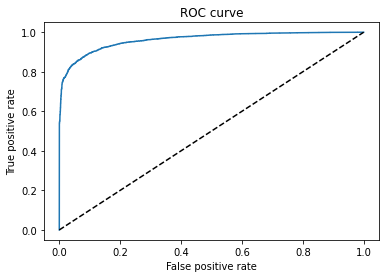

In [143]:
plt.plot(fpr, tpr)
# We plot the false positive rate along the x-axis and the true positive rate along the y-axis,
# thus plotting the ROC curve.
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('False positive rate')
# We name the x-axis "False positive rate".
plt.ylabel('True positive rate')
# We name the x-axis "True positive rate".
plt.title('ROC curve')
# We name the graph "ROC curve".

In [144]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC

## AUC is 96% which is very remarkably good

0.9625079110881466

### Gini and Kolmogorov-Smirnov

In [145]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
# Sorts a dataframe by the values of a specific column.
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
# We reset the index of a dataframe and overwrite it.
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'bad', which is
# the difference between the cumulative number of all observations and cumulative number of 'good' for each row.

In [146]:
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
# We calculate the cumulative percentage of 'bad'.

Text(0.5, 0, 'Cumulative % Population')

Text(0, 0.5, 'Cumulative % Bad')

Text(0.5, 1.0, 'Gini')

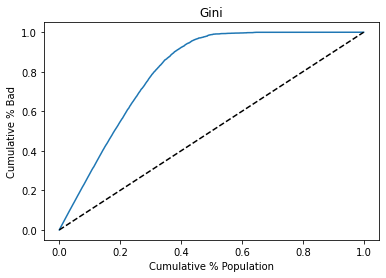

In [147]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
# We name the x-axis "Cumulative % Population".
plt.ylabel('Cumulative % Bad')
# We name the y-axis "Cumulative % Bad".
plt.title('Gini')
# We name the graph "Gini".

In [148]:
Gini = AUROC * 2 - 1
# Here we calculate Gini from AUROC.
Gini
## Gini is 92.5% which is very remarkably good

0.9250158221762932

Text(0.5, 0, 'Estimatoed Probability for being Good')

Text(0, 0.5, 'Cumulative %')

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

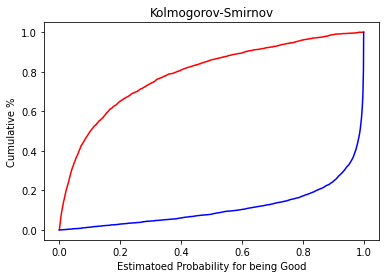

In [149]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted (estimated) probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimatoed Probability for being Good')
# We name the x-axis "Estimated Probability for being Good".
plt.ylabel('Cumulative %')
# We name the y-axis "Cumulative %".
plt.title('Kolmogorov-Smirnov')
# We name the graph "Kolmogorov-Smirnov".

In [150]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

## KS is 80% and the graph shows that it's able to differentiate quite well. 

0.7967434577064121

## Precision,Recall and F1-score

In [153]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report,f1_score

In [154]:
pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test'], rownames = ['Actual'], colnames = ['Predicted'])
# Creates a cross-table where the actual values are displayed by rows and the predicted values by columns.
Pr=round(100*precision_score(y_hat_test, loan_data_targets_test),1)
Rc=round(100*recall_score(y_hat_test, loan_data_targets_test),1)
F1=round(100*f1_score(y_hat_test, loan_data_targets_test),1)
Ac=round(100*metrics.accuracy_score(y_hat_test, loan_data_targets_test),1)
print(" Accuracy=", Ac,"\n","Precision=",Pr,"\n","Recall=",Rc,"\n","and F1 score=",F1)

Predicted     0     1
Actual               
0.0000     2873   336
1.0000      635  5507

 Accuracy= 90.0 
 Precision= 92.1 
 Recall= 92.7 
 and F1 score= 92.4


In [156]:
test_score_df=pd.DataFrame({'predict_prob':y_hat_test_proba, 'actual_output':loan_data_targets_test})
test_score_df['Decile']=pd.qcut(test_score_df['predict_prob'],10,labels=False)
test_score_df['Decile']=test_score_df['Decile']+1
#test_score_df.sort_values(by='Decile',ascending=False)

In [157]:
## Putting Threshold at 70% 
test_score_df['predicted_output']=(test_score_df.predict_prob>0.7).astype(int)

In [161]:
test_score_df.groupby('Decile').agg({'predicted_output':[sum,'count'],'actual_output':sum}).sort_values(by='Decile',ascending=False)

predicted_output       actual_output
                    sum count           sum
Decile                                     
10                  935   935      935.0000
9                   935   935      935.0000
8                   935   935      934.0000
7                   935   935      925.0000
6                   935   935      907.0000
5                   901   935      726.0000
4                     0   935      467.0000
3                     0   935      199.0000
2                     0   935       88.0000
1                     0   936       26.0000

In [162]:
## Final Prediction:- After setting threshold at 70%.. predicting  top 6 decile for granting Loan and rejecting the last 4 deciles

## POINT CALCULATION .. BUsinedss model point Calculation 
Bus_model_points =(test_score_df.actual_output==1).sum() - (test_score_df.actual_output==0).sum()
###  Model Point Calculation
Model_correct_points=test_score_df[test_score_df.Decile.isin(range(5,11))].actual_output.sum()
Model_lost_points=test_score_df[test_score_df.Decile.isin(range(5,11))].shape[0] - Model_correct_points
Model_points=Model_correct_points - Model_lost_points
Bus_model_points,Model_points

test_score_df.shape
(test_score_df.actual_output==1).sum()
(test_score_df.actual_output==0).sum()

print("Model correct point=",Model_correct_points,"Model lost points=",Model_lost_points,"Model Total point=",Model_points)

(2933, 5114.0)

(9351, 4)

6142

3209

Model correct point= 5362.0 Model lost points= 248.0 Model Total point= 5114.0


## Prediction on the NON granted/Rjected Application

In [163]:
Rjected_Appl_df['Tot_Acc_Money']=Rjected_Appl_df.saving_amount+Rjected_Appl_df.checking_amount

In [164]:
## Missing Value Treatment
# Creating a separate category for First loaners in 'fully_repaid_previous_loans' & 'currently_repaying_other_loans'- value = 2
Rjected_Appl_df.fully_repaid_previous_loans.fillna(2,inplace=True)
Rjected_Appl_df.currently_repaying_other_loans.fillna(2,inplace=True)
## It looks like they don't have any credit limits so might be not useful and  its small fraction so dropping the rows
Rjected_Appl_df.dropna(axis=0,subset=['avg_percentage_credit_card_limit_used_last_year'],inplace=True)
Rjected_Appl_df.shape
Rjected_Appl_df.isna().values.sum()

(47377, 17)

47377

## Predicting on Not Granted loan data

In [165]:
loan_data_rejected_dummies = [pd.get_dummies(Rjected_Appl_df['fully_repaid_previous_loans'], prefix = 'fully_repaid_previous_loans', prefix_sep = ':'),
                     pd.get_dummies(Rjected_Appl_df['currently_repaying_other_loans'], prefix = 'currently_repaying_other_loans', prefix_sep = ':'),
                     pd.get_dummies(Rjected_Appl_df['is_employed'], prefix = 'is_employed', prefix_sep = ':'),
                     pd.get_dummies(Rjected_Appl_df['dependent_number'], prefix = 'dependent_number', prefix_sep = ':'),
                     pd.get_dummies(Rjected_Appl_df['loan_purpose'], prefix = 'loan_purpose', prefix_sep = ':')]
# We create dummy variables from all 5 original independent variables, and save them into a list.
# Note that we are using a particular naming convention for all variables: original variable name, colon, category name.

In [166]:
loan_data_rejected_dummies = pd.concat(loan_data_rejected_dummies, axis = 1)
# We concatenate the dummy variables and this turns them into a dataframe

In [167]:
Rjected_Appl_df.shape
Rjected_Appl_df = pd.concat([Rjected_Appl_df, loan_data_rejected_dummies], axis = 1)
Rjected_Appl_df.shape
Rjected_Appl_df_copy=Rjected_Appl_df.copy()
# Concatenates two dataframes.
# Here we concatenate the dataframe with original data with the dataframe with dummy variables, along the columns. 

(47377, 17)

(47377, 39)

In [168]:
## Normalizing numerical variables
Rjected_Appl_df[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']]=StandardScaler().fit_transform(Rjected_Appl_df[['total_credit_card_limit','yearly_salary','age','Tot_Acc_Money']])

In [169]:
# Here we select a limited set of input variables in a new dataframe.
inputs_rejected_with_ref_cat = Rjected_Appl_df.loc[: , independent_cols]

In [170]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['fully_repaid_previous_loans:0.0',
'currently_repaying_other_loans:1.0',
'is_employed:0',
'dependent_number:8',
'loan_purpose:emergency_funds']

In [171]:
inputs_rejected = inputs_rejected_with_ref_cat.drop(ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_rejected.head()

total_credit_card_limit  avg_percentage_credit_card_limit_used_last_year  \
0                   2.0496                                           0.4900   
1                   0.1508                                           1.0300   
3                  -1.6395                                           0.8200   
4                   1.4528                                           0.8000   
6                  -1.9650                                           0.8900   

   yearly_salary     age  ...  loan_purpose:business  loan_purpose:home  \
0        -0.7428  0.4351  ...                      1                  0   
1        -0.0046 -0.6566  ...                      0                  0   
3        -0.7428 -1.3585  ...                      0                  0   
4         0.2469 -0.4227  ...                      0                  0   
6        -0.7428  0.6691  ...                      0                  0   

   loan_purpose:investment  loan_purpose:other  
0                        0                   0  
1                        1                   0  
3                        1                   0  
4                        0                   0  
6                        0                   0  

[5 rows x 22 columns]

In [172]:
y_hat_rej_proba = reg.predict_proba(inputs_rejected)
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_rej_proba = y_hat_rej_proba[: ][: , 1]

In [174]:
rej_score_df=pd.DataFrame({'predict_prob':y_hat_rej_proba})
rej_score_df['Decile']=pd.qcut(rej_score_df['predict_prob'],10,labels=False)
rej_score_df['Decile']=rej_score_df['Decile']+1
#rej_score_df.sort_values(by='Decile',ascending=False)


In [175]:
loan_ids= Rjected_Appl_df.iloc[rej_score_df[rej_score_df.Decile.isin(range(7,11))].index].loan_id.tolist()

In [176]:
Rjected_Appl_df.iloc[rej_score_df[rej_score_df.Decile.isin(range(7,11))].index].shape

(18951, 39)

## RECOMMENDING TOP 4 DECILES FOR GRANTING LOAN WHICH WAS REJECTED INITAILY by Bank model. Granted Loans (by  model):- COUNT IS 18951 & LOAN_ids stored in var:loan_ids